<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Microbial-and-Viral-differentials" data-toc-modified-id="Microbial-and-Viral-differentials-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Microbial and Viral differentials</a></span></li><li><span><a href="#Viral-differentials" data-toc-modified-id="Viral-differentials-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Viral differentials</a></span></li></ul></div>

In [1]:
import os
import arviz as az
import umap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import dask.dataframe as dd
import networkx as nx
import seaborn as sns
import matplotlib as mpl

from matplotlib_venn import venn2, venn3
np.random.seed(0)
%matplotlib inline

In [2]:
all_edges = pd.read_table('../results/interaction_metadata.txt', index_col=0)

In [3]:
all_edges

,virus,rank,microbe,gtdb,dataset,kingdom,phylum,class,order,family,genus,species
87,uvig_143237,11.800369,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus salivarius
134,uvig_216549,7.767537,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus salivarius
182,uvig_236116,5.448109,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus salivarius
251,uvig_284465,4.564700,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus salivarius
275,uvig_293127,6.438794,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,Streptococcus salivarius
...,...,...,...,...,...,...,...,...,...,...,...,...
3084,uvig_370156,7.377481,G000434095,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides fragilis
3088,uvig_371046,6.930983,G000434095,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides fragilis
3193,uvig_422447,9.869628,G000434095,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides fragilis
3195,uvig_422532,9.095410,G000434095,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,Bacteroides fragilis


In [4]:
graph = nx.from_pandas_edgelist(all_edges, 'microbe', 'virus')

In [5]:
nx.number_connected_components(graph)

4

In [6]:
components = nx.connected_components(graph)
#c1 = next(components)
#c2 = next(components)
for c in components:
    print('Nodes', len(c))

Nodes 237
Nodes 26
Nodes 2
Nodes 2


In [7]:
pos = nx.spring_layout(graph, k=3, iterations=500)
pos_df = pd.DataFrame(pos).T

In [8]:
microbe_nodes = pd.merge(all_edges, pos_df, left_on='microbe', right_index=True)
virus_nodes = pd.merge(all_edges, pos_df, left_on='virus', right_index=True)

microbe_nodes = microbe_nodes.set_index('microbe').drop_duplicates()
virus_nodes = virus_nodes.set_index('virus').drop_duplicates()

microbe_nodes = microbe_nodes[~microbe_nodes.index.duplicated(keep='first')]
virus_nodes = virus_nodes[~virus_nodes.index.duplicated(keep='first')]

species_pos = microbe_nodes.groupby('species').mean()
genus_pos = microbe_nodes.groupby('genus').mean()

In [9]:
species_pos

,rank,0,1
species,,,
Alistipes putredinis,5.223729,0.237163,-0.051897
Bacteroides fragilis,5.607162,0.258532,0.591922
Bacteroides oleiciplenus,6.699333,-0.334662,0.276430
Bacteroides thetaiotaomicron,3.808751,-0.471824,-0.182081
Bacteroides uniformis,9.364447,-0.135342,-0.410299
Escherichia coli,5.893929,0.043285,0.083545
Holdemanella biformis,1.213832,0.453707,-0.393227
Holdemania filiformis,5.434001,-0.735009,-0.243972
Klebsiella pneumoniae,4.257518,0.103811,-0.462182


# Microbial and Viral differentials

In [10]:
!ls ../sfari/data/sra_shotgun/Combined/age_sex_matched_posterior

differential_posterior.nc  ogus_differentials-v5.nc   viral_differentials-v3.nc
ogus_differentials-v2.nc   ogus_differentials-v7.nc   viral_differentials-v4.nc
ogus_differentials-v3.nc   viral_differentials.nc     viral_differentials-v5.nc
ogus_differentials-v4.nc   viral_differentials-v2.nc


In [11]:
# load 16S, whole genome shotgun and RNAseq data
from util import extract_differentials, ranking
wgs_directory = '../sfari/data/sra_shotgun/Combined'
posterior_name = 'age_sex_matched_posterior'
wgs_fname = f'{wgs_directory}/{posterior_name}/ogus_differentials-v7.nc'
vir_fname = f'{wgs_directory}/{posterior_name}/viral_differentials-v5.nc'

wgs_diffs = extract_differentials(wgs_fname)
vir_diffs = extract_differentials(vir_fname)


wgs_stats = ranking(wgs_diffs, reference_percentile=50)
vir_stats = ranking(vir_diffs, reference_percentile=50)

In [12]:
microbe_nodes.index = list(map(str, microbe_nodes.index))
microbe_nodes = pd.merge(microbe_nodes, wgs_stats, left_index=True, right_index=True)
microbe_nodes['diff'] = microbe_nodes['mean']

virus_nodes.index = list(map(str, virus_nodes.index))
virus_nodes = pd.merge(virus_nodes, vir_stats, left_index=True, right_index=True)
virus_nodes['diff'] = virus_nodes['mean']

In [13]:
microbe_nodes

,virus,rank,gtdb,dataset,kingdom,phylum,class,order,family,genus,...,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
G000785515,uvig_143237,11.800369,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,1.346660,0.189473,1.050854,1.344860,1.678797,37.511230,27.855013,-11.757832,1.310116e-27,1.346660
G000428565,ivig_446,9.112566,Bacteroidota/Bacteroidia/Bacteroidales/Tannere...,Wang,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Tannerellaceae,Parabacteroides,...,0.993558,0.136791,0.776094,0.988919,1.221047,53.097887,53.442188,-67.912637,2.377370e-221,0.993558
G000154205,ivig_446,9.364447,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Wang,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,0.889650,0.185411,0.581239,0.884912,1.225792,25.878929,29.088888,-61.312278,3.511852e-205,0.889650
G000240185,uvig_102712,4.257518,Proteobacteria/Gammaproteobacteria/Enterobacte...,Dan,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Klebsiella,...,1.920052,0.246228,1.522240,1.919618,2.328531,31.669275,16.493967,37.526378,5.956664e-133,1.920052
G000012005,uvig_112179,4.193787,Proteobacteria/Gammaproteobacteria/Enterobacte...,Dan,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,...,1.337000,0.264255,0.924126,1.332782,1.775153,19.146354,14.320387,-9.161616,2.719023e-18,1.337000
G000598965,uvig_120986,3.653997,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Dan,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,1.367526,0.240448,0.985592,1.372652,1.759091,23.653454,17.296529,-7.529599,3.427961e-13,1.367526
G000190535,uvig_220994,1.284231,Bacteroidota/Bacteroidia/Bacteroidales/Marinif...,Dan,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,...,0.551137,0.151701,0.305032,0.551582,0.812323,23.948873,43.453552,-119.566089,1.414474e-314,0.551137
G000156655,uvig_296109,1.213832,Firmicutes/Bacilli/Erysipelotrichales/Erysipel...,Dan,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Holdemanella,...,1.130307,0.126314,0.928189,1.139545,1.328505,70.842277,62.675249,-51.893273,1.678076e-179,1.130307
G001915655,uvig_462587,1.363376,Bacteroidota/Bacteroidia/Bacteroidales/Marinif...,Dan,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,...,0.481321,0.197819,0.161875,0.480638,0.802355,12.299770,25.554205,-98.749578,1.621332e-282,0.481321
G900227605,uvig_4988,6.362044,Proteobacteria/Gammaproteobacteria/Enterobacte...,Dan,Bacteria,Proteobacteria,Gammaproteobacteria,Enterobacterales,Enterobacteriaceae,Escherichia,...,1.188150,0.182537,0.899164,1.184894,1.488127,35.658921,30.012142,-29.572043,1.344999e-102,1.188150


/mnt/home/jmorton/miniconda3/envs/qiime2-2021.4/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='mean', ylabel='Density'>

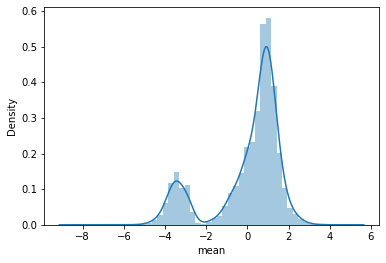

In [14]:
sns.distplot(wgs_stats['mean'])

In [15]:
wgs_stats['mean'].describe()

count    9.799000e+03
mean    -3.074499e-16
std      1.703007e+00
min     -8.317397e+00
25%     -4.011225e-01
50%      6.538740e-01
75%      1.090601e+00
max      4.843822e+00
Name: mean, dtype: float64

In [16]:
microbe_nodes.sort_values('mean')

,virus,rank,gtdb,dataset,kingdom,phylum,class,order,family,genus,...,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
G001915655,uvig_462587,1.363376,Bacteroidota/Bacteroidia/Bacteroidales/Marinif...,Dan,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,...,0.481321,0.197819,0.161875,0.480638,0.802355,12.299770,25.554205,-98.749578,1.621332e-282,0.481321
G000190535,uvig_220994,1.284231,Bacteroidota/Bacteroidia/Bacteroidales/Marinif...,Dan,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Marinifilaceae,Odoribacter,...,0.551137,0.151701,0.305032,0.551582,0.812323,23.948873,43.453552,-119.566089,1.414474e-314,0.551137
G000157935,uvig_126335,7.810087,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Prevotella,...,0.746179,0.347518,0.160290,0.749251,1.295783,6.178569,8.280275,-40.968815,4.945776e-145,0.746179
G000154205,ivig_446,9.364447,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Wang,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,0.889650,0.185411,0.581239,0.884912,1.225792,25.878929,29.088888,-61.312278,3.511852e-205,0.889650
G000315485,uvig_176146,6.699333,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,0.899260,0.083615,0.763240,0.901694,1.028805,128.621169,143.030048,-133.657172,0.000000e+00,0.899260
G000428565,ivig_446,9.112566,Bacteroidota/Bacteroidia/Bacteroidales/Tannere...,Wang,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Tannerellaceae,Parabacteroides,...,0.993558,0.136791,0.776094,0.988919,1.221047,53.097887,53.442188,-67.912637,2.377370e-221,0.993558
G000154465,uvig_144762,5.223729,Bacteroidota/Bacteroidia/Bacteroidales/Rikenel...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Rikenellaceae,Alistipes,...,1.065789,0.182510,0.763644,1.065928,1.349412,31.996018,30.020971,-42.985040,8.011707e-152,1.065789
G000969835,uvig_413781,1.527968,Bacteroidota/Bacteroidia/Bacteroidales/Tannere...,Dan,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Tannerellaceae,Parabacteroides,...,1.105651,0.179918,0.809239,1.102352,1.386113,34.156133,30.892322,-39.173234,8.272253e-139,1.105651
G000011065,uvig_89698,3.808751,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,1.110004,0.131526,0.906492,1.115007,1.319186,64.165657,57.806715,-52.924422,1.765094e-182,1.110004
G000156655,uvig_296109,1.213832,Firmicutes/Bacilli/Erysipelotrichales/Erysipel...,Dan,Bacteria,Firmicutes,Bacilli,Erysipelotrichales,Erysipelotrichaceae,Holdemanella,...,1.130307,0.126314,0.928189,1.139545,1.328505,70.842277,62.675249,-51.893273,1.678076e-179,1.130307


# Viral differentials

In [17]:
coords = {
    'Klebsiella': {'dx': -0.0, 'dy': 0.01},
    'Escherichia': {'dx': -0.0, 'dy': 0.01},
    'Bacteroides': {'dx': 0.0, 'dy': 0.0},
    'Veillonella': {'dx': 0, 'dy': -0.1},
    'Collinsella': {'dx': -0.0, 'dy': 0.00},
    'Tidjanibacter': {'dx': -0.0, 'dy': 0.00},
}

In [18]:
coords = {
    'Klebsiella': {'dx': -0, 'dy': 0},
    'Escherichia': {'dx': 0.0, 'dy': 0.0},
    'Bacteroides': {'dx': 0.0, 'dy': 0},
    'Prevotella': {'dx': -0., 'dy': -0},
    'Alistipes': {'dx': -0, 'dy': -0}, 
    'Bifidobacterium': {'dx': -0, 'dy': 0.0}
}

In [19]:
species_pos

,rank,0,1
species,,,
Alistipes putredinis,5.223729,0.237163,-0.051897
Bacteroides fragilis,5.607162,0.258532,0.591922
Bacteroides oleiciplenus,6.699333,-0.334662,0.276430
Bacteroides thetaiotaomicron,3.808751,-0.471824,-0.182081
Bacteroides uniformis,9.364447,-0.135342,-0.410299
Escherichia coli,5.893929,0.043285,0.083545
Holdemanella biformis,1.213832,0.453707,-0.393227
Holdemania filiformis,5.434001,-0.735009,-0.243972
Klebsiella pneumoniae,4.257518,0.103811,-0.462182


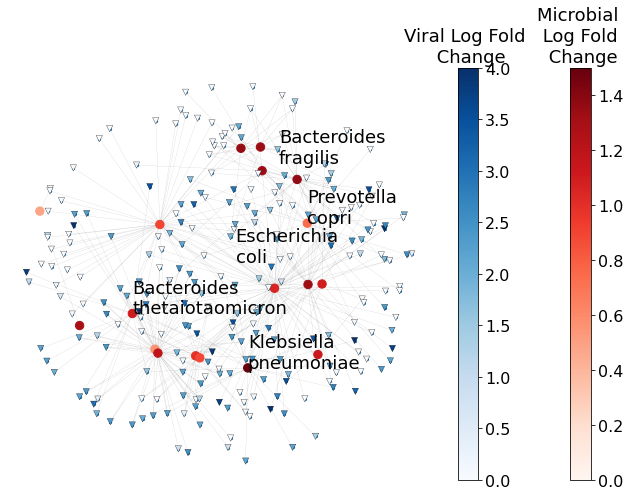

In [20]:
import matplotlib as mpl

#from matplotlib.colors import TwoSlopeNorm

fig, ax = plt.subplots(figsize=(9.5, 7))
nx.draw(graph, pos=pos, node_size=5, width=0.1, edge_color='gray')

norm1 =mpl.colors.Normalize(vmin=0, vmax=1.5)
norm2 = mpl.colors.Normalize(vmin=0, vmax=4.0)
#norm = mpl.colors.Normalize(vmin=0, vmax=1.5)

cbar1 = ax.scatter(microbe_nodes[0], microbe_nodes[1], s=70, zorder=2, 
                   c=microbe_nodes['diff'], cmap='Reds', norm=norm1)
cbar2 = ax.scatter(virus_nodes[0], virus_nodes[1], s=40, zorder=2, 
                   c=virus_nodes['diff'], cmap='Blues', ec='k', lw=0.3, norm=norm2,
                   marker='v')
clb1 = plt.colorbar(cbar1)
clb2 = plt.colorbar(cbar2)
clb1.ax.tick_params(labelsize=16) 
clb2.ax.tick_params(labelsize=16) 
clb1.ax.set_title('Microbial \n Log Fold \n Change', fontsize=18)
clb2.ax.set_title('Viral Log Fold \n Change', fontsize=18)

for s in species_pos.index:
    row = species_pos.loc[s]
    if row.name in {'Citrobacter', 'Megamonas', 'Mitsuokella'}:
        continue
    if row.name not in {'Bacteroides fragilis', 'Prevotella copri', 
                        'Klebsiella pneumoniae', 'Bacteroides thetaiotaomicron',
                        'Escherichia coli'}:
        continue
    name = row.name.replace(' ', '\n')
    #if name in coords:
    #dx, dy = coords[name]['dx'], coords[name]['dy']
    dx, dy = 0, 0
    #if row.name == 'Bacteroides fragilis':
    #    dx, dy = 0, -.2
    
    ax.annotate(name, (row[0] + dx, row[1] + dy), 
                fontsize=18, 
                color='k')
#ax.set_facecolor('black')
#fig.set_facecolor('black')
plt.tight_layout()

In [21]:
species_pos

,rank,0,1
species,,,
Alistipes putredinis,5.223729,0.237163,-0.051897
Bacteroides fragilis,5.607162,0.258532,0.591922
Bacteroides oleiciplenus,6.699333,-0.334662,0.276430
Bacteroides thetaiotaomicron,3.808751,-0.471824,-0.182081
Bacteroides uniformis,9.364447,-0.135342,-0.410299
Escherichia coli,5.893929,0.043285,0.083545
Holdemanella biformis,1.213832,0.453707,-0.393227
Holdemania filiformis,5.434001,-0.735009,-0.243972
Klebsiella pneumoniae,4.257518,0.103811,-0.462182


In [22]:
species_pos = microbe_nodes.groupby('species').mean()

In [23]:
species_pos.to_csv('../results/mmvec/species_positions.csv')

In [24]:
species_pos

,rank,0,1,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
species,,,,,,,,,,,,,
Alistipes putredinis,5.223729,0.237163,-0.051897,1.065789,0.182510,0.763644,1.065928,1.349412,31.996018,30.020971,-42.985040,8.011707e-152,1.065789
Bacteroides fragilis,5.607162,0.258532,0.591922,1.349989,0.263529,0.929239,1.347167,1.780631,19.937044,14.735024,-8.146965,1.714253e-13,1.349989
Bacteroides oleiciplenus,6.699333,-0.334662,0.276430,0.899260,0.083615,0.763240,0.901694,1.028805,128.621169,143.030048,-133.657172,0.000000e+00,0.899260
Bacteroides thetaiotaomicron,3.808751,-0.471824,-0.182081,1.110004,0.131526,0.906492,1.115007,1.319186,64.165657,57.806715,-52.924422,1.765094e-182,1.110004
Bacteroides uniformis,9.364447,-0.135342,-0.410299,0.889650,0.185411,0.581239,0.884912,1.225792,25.878929,29.088888,-61.312278,3.511852e-205,0.889650
Escherichia coli,5.893929,0.043285,0.083545,1.293396,0.232972,0.919700,1.293815,1.674487,25.374119,20.021418,-15.635082,1.357863e-15,1.293396
Holdemanella biformis,1.213832,0.453707,-0.393227,1.130307,0.126314,0.928189,1.139545,1.328505,70.842277,62.675249,-51.893273,1.678076e-179,1.130307
Holdemania filiformis,5.434001,-0.735009,-0.243972,1.290062,0.098305,1.132185,1.291455,1.452364,133.493217,103.478107,-34.176755,1.379281e-120,1.290062
Klebsiella pneumoniae,4.257518,0.103811,-0.462182,1.920052,0.246228,1.522240,1.919618,2.328531,31.669275,16.493967,37.526378,5.956664e-133,1.920052


In [25]:
genus_pos

,rank,0,1
genus,,,
Alistipes,5.223729,0.237163,-0.051897
Bacteroides,6.217371,-0.084953,0.173579
Escherichia,5.893929,0.043285,0.083545
Holdemanella,1.213832,0.453707,-0.393227
Holdemania,5.434001,-0.735009,-0.243972
Klebsiella,4.257518,0.103811,-0.462182
Odoribacter,1.323803,-0.646345,-0.010334
Parabacteroides,5.320267,0.159144,-0.214999
Prevotella,7.810087,0.400780,0.283234


In [26]:
!ls ../results

16S_compounds.csv		   kegg_counts.csv
16S_KEGG.csv			   kegg_embeddings.csv
age-sex-classifier		   metabolomics
amp_agesex_shap.csv		   mmvec
amp_combined_diffs.csv		   phylofactor
amp_compound_edges.npz.npy	   phylogenetic
amp_compound_edges.parquet	   pls
amp-crossectional.csv		   random_forests
amp-crossectional-studies.csv	   rna_compound_edges.npz.npy
amplicon_differentials.csv	   rna_compound_edges.parquet
amp-logodds.csv			   RNA_compounds.csv
amp_subset.csv			   RNA_KEGG.csv
asd_core_microbiome_fmt.csv	   seqs.fa
asd_diabetes_differential.csv	   supplemental_tables
asd_ibd_differential.csv	   t1d__kegg_set.csv
asd_ibd_kegg_set.csv		   t1d__taxa_set.csv
asd_ibd_taxa_set.csv		   top_asd_dia_specific_taxa.csv
asd__kegg_set.csv		   top_asd_specific_taxa.csv
asd_specific_microbiome_fmt.csv    top_asd_taxa.csv
asd_t1d_kegg_set.csv		   top_diabetes_taxa.csv
asd_t1d_taxa_set.csv		   top_dia_specific_taxa.csv
asd__taxa_set.csv		   top_ibd_asd_specific_taxa.csv
benchmarking			   top_ibd_

In [27]:
microbe_nodes.to_csv('microbe-viral-interactions.csv')
microbe_nodes.to_csv('../results/supplemental_tables/Table_S10.csv')

In [28]:
vir_stats 

,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue
features,,,,,,,,,
ivig_10,1.053632,3.035314,-3.570961,1.019365,6.031626,0.114362,0.108541,-10.103344,1.605418e-21
ivig_1001,1.635049,3.145068,-3.461144,1.530428,6.872784,0.165299,0.101097,-6.053445,3.272889e-09
ivig_1002,-2.866093,3.613318,-8.987377,-2.679767,2.593584,-0.219522,0.076593,-30.183151,4.748516e-105
ivig_1113,-2.592913,3.468718,-8.775608,-2.078443,2.564733,-0.215501,0.083112,-29.866289,8.822829e-104
ivig_1131,2.275230,1.964405,-0.933539,2.343762,5.453817,0.589608,0.259142,-3.173918,1.620548e-03
...,...,...,...,...,...,...,...,...,...
uvig_98139,-5.252767,2.961537,-9.862510,-5.266059,-0.483988,-0.598899,0.114016,-52.943727,1.553921e-182
uvig_98916,2.269345,0.367489,1.681462,2.260120,2.869062,16.803937,7.404752,-17.286404,2.245056e-50
uvig_9921,2.610084,3.200887,-2.251464,2.284639,8.439052,0.254750,0.097602,0.144403,8.852552e-01


In [29]:
virus_nodes

,rank,microbe,gtdb,dataset,kingdom,phylum,class,order,family,genus,...,mean,std,5%,50%,95%,effect_size,effect_std,tstat,pvalue,diff
uvig_143237,11.800369,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,2.231930,0.520495,1.411595,2.220027,3.065577,8.238471,3.691187,-13.642527,4.748544e-35,2.231930
uvig_216549,7.767537,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,-2.990300,3.656409,-9.700528,-2.497982,2.271972,-0.223669,0.074798,-30.506832,2.429915e-106,-2.990300
uvig_236116,5.448109,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,0.170961,2.805099,-4.666309,0.307130,4.583582,0.021727,0.127088,-17.225859,4.091814e-50,0.170961
uvig_284465,4.564700,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,-2.774229,3.187699,-8.097757,-2.842323,2.350139,-0.273016,0.098411,-33.636813,1.548483e-118,-2.774229
uvig_293127,6.438794,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,-2.716374,3.538996,-9.135999,-2.344064,2.389080,-0.216885,0.079844,-29.970913,3.357441e-104,-2.716374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uvig_583463,3.175989,G000315485,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,-1.574876,3.306644,-7.945926,-1.014473,2.944876,-0.144036,0.091459,-25.172645,2.070047e-84,-1.574876
uvig_74031,4.809927,G000315485,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,-1.314393,3.106365,-6.997980,-0.813292,2.798103,-0.136214,0.103632,-25.118532,3.507262e-84,-1.314393
uvig_74555,6.556007,G000315485,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,-2.847229,3.216115,-8.717707,-2.687406,2.069595,-0.275270,0.096680,-33.793580,3.917417e-119,-2.847229
uvig_80618,6.412282,G000315485,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,-1.381532,3.369688,-7.712363,-0.896305,3.557129,-0.121669,0.088069,-23.554143,1.624199e-77,-1.381532


In [30]:
pd.merge(virus_nodes, vir_stats, left_index=True, right_index=True)

,rank,microbe,gtdb,dataset,kingdom,phylum,class,order,family,genus,...,diff,mean_y,std_y,5%_y,50%_y,95%_y,effect_size_y,effect_std_y,tstat_y,pvalue_y
uvig_143237,11.800369,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,2.231930,2.231930,0.520495,1.411595,2.220027,3.065577,8.238471,3.691187,-13.642527,4.748544e-35
uvig_216549,7.767537,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,-2.990300,-2.990300,3.656409,-9.700528,-2.497982,2.271972,-0.223669,0.074798,-30.506832,2.429915e-106
uvig_236116,5.448109,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,0.170961,0.170961,2.805099,-4.666309,0.307130,4.583582,0.021727,0.127088,-17.225859,4.091814e-50
uvig_284465,4.564700,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,-2.774229,-2.774229,3.187699,-8.097757,-2.842323,2.350139,-0.273016,0.098411,-33.636813,1.548483e-118
uvig_293127,6.438794,G000785515,Firmicutes/Bacilli/Lactobacillales/Streptococc...,Wang,Bacteria,Firmicutes,Bacilli,Lactobacillales,Streptococcaceae,Streptococcus,...,-2.716374,-2.716374,3.538996,-9.135999,-2.344064,2.389080,-0.216885,0.079844,-29.970913,3.357441e-104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
uvig_583463,3.175989,G000315485,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,-1.574876,-1.574876,3.306644,-7.945926,-1.014473,2.944876,-0.144036,0.091459,-25.172645,2.070047e-84
uvig_74031,4.809927,G000315485,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,-1.314393,-1.314393,3.106365,-6.997980,-0.813292,2.798103,-0.136214,0.103632,-25.118532,3.507262e-84
uvig_74555,6.556007,G000315485,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,-2.847229,-2.847229,3.216115,-8.717707,-2.687406,2.069595,-0.275270,0.096680,-33.793580,3.917417e-119
uvig_80618,6.412282,G000315485,Bacteroidota/Bacteroidia/Bacteroidales/Bactero...,Averina,Bacteria,Bacteroidota,Bacteroidia,Bacteroidales,Bacteroidaceae,Bacteroides,...,-1.381532,-1.381532,3.369688,-7.712363,-0.896305,3.557129,-0.121669,0.088069,-23.554143,1.624199e-77
